<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-1-Build/blob/master/Linear_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

df = pd.read_excel('PWGI_Voice_Acct_imp.xlsx')
df.head()

,Country Name,1972-01-01 00:00:00,1973-01-01 00:00:00,1974-01-01 00:00:00,1975-01-01 00:00:00,1976-01-01 00:00:00,1977-01-01 00:00:00,1978-01-01 00:00:00,1979-01-01 00:00:00,1980-01-01 00:00:00,1981-01-01 00:00:00,1982-01-01 00:00:00,1983-01-01 00:00:00,1984-01-01 00:00:00,1985-01-01 00:00:00,1986-01-01 00:00:00,1987-01-01 00:00:00,1988-01-01 00:00:00,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00
0,Afghanistan,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.967935,-2.039168,-2.009343,-1.979517,-1.775132,-1.571305,-1.281051,-1.247893,-1.179165,-1.190848,-1.124618,-1.236096,-1.460451,-1.481582,-1.404247,-1.319379,-1.288254,-1.161956,-1.161956,-1.161956,-1.161956,-1.161956,-1.161956
1,Albania,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.604993,-0.454046,-0.387508,-0.320970,-0.182441,-0.044290,0.056120,0.033770,0.032410,0.054178,0.093052,0.159377,0.126599,0.112058,0.050285,-0.002467,0.038708,0.163576,0.163576,0.163576,0.163576,0.163576,0.163576
2,Algeria,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.321199,-1.375024,-1.293113,-1.211201,-1.164895,-1.118715,-1.136588,-0.815118,-0.763327,-0.923716,-0.999915,-0.989559,-1.057287,-1.026946,-1.000296,-0.897813,-0.888668,-0.928584,-0.928584,-0.928584,-0.928584,-0.928584,-0.928584
3,American Samoa,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.637373,0.583289,1.007130,1.003920,0.995612,1.023958,1.047435,1.059505,1.044215,1.044215,1.044215,1.044215,1.044215,1.044215,1.044215
4,Andorra,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.519706,1.498566,1.499967,1.501369,1.444286,1.387358,1.302483,1.476026,1.449135,1.342189,1.321646,1.345984,1.327729,1.333665,1.369121,1.427852,1.404860,1.189276,1.189276,1.189276,1.189276,1.189276,1.189276


In [0]:
df.set_index('Country Name', inplace=True)
df.head()

,1972-01-01 00:00:00,1973-01-01 00:00:00,1974-01-01 00:00:00,1975-01-01 00:00:00,1976-01-01 00:00:00,1977-01-01 00:00:00,1978-01-01 00:00:00,1979-01-01 00:00:00,1980-01-01 00:00:00,1981-01-01 00:00:00,1982-01-01 00:00:00,1983-01-01 00:00:00,1984-01-01 00:00:00,1985-01-01 00:00:00,1986-01-01 00:00:00,1987-01-01 00:00:00,1988-01-01 00:00:00,1989-01-01 00:00:00,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.896506,-1.967935,-2.039168,-2.009343,-1.979517,-1.775132,-1.571305,-1.281051,-1.247893,-1.179165,-1.190848,-1.124618,-1.236096,-1.460451,-1.481582,-1.404247,-1.319379,-1.288254,-1.161956,-1.161956,-1.161956,-1.161956,-1.161956,-1.161956
Albania,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.756354,-0.604993,-0.454046,-0.387508,-0.320970,-0.182441,-0.044290,0.056120,0.033770,0.032410,0.054178,0.093052,0.159377,0.126599,0.112058,0.050285,-0.002467,0.038708,0.163576,0.163576,0.163576,0.163576,0.163576,0.163576
Algeria,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.267226,-1.321199,-1.375024,-1.293113,-1.211201,-1.164895,-1.118715,-1.136588,-0.815118,-0.763327,-0.923716,-0.999915,-0.989559,-1.057287,-1.026946,-1.000296,-0.897813,-0.888668,-0.928584,-0.928584,-0.928584,-0.928584,-0.928584,-0.928584
American Samoa,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.473212,0.637373,0.583289,1.007130,1.003920,0.995612,1.023958,1.047435,1.059505,1.044215,1.044215,1.044215,1.044215,1.044215,1.044215,1.044215
Andorra,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.540904,1.519706,1.498566,1.499967,1.501369,1.444286,1.387358,1.302483,1.476026,1.449135,1.342189,1.321646,1.345984,1.327729,1.333665,1.369121,1.427852,1.404860,1.189276,1.189276,1.189276,1.189276,1.189276,1.189276


In [0]:
scatterable = df.T
scatterable.head()

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,...,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,"Taiwan, China",Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1972-01-01 00:00:00,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1973-01-01 00:00:00,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1974-01-01 00:00:00,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1975-01-01 00:00:00,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.39

In [0]:
df2 = pd.read_excel('PWGI Voice Acct NANs.xlsx')
df2.head()

,Country Name,Country Code,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.896506,NaN,-2.039168,NaN,-1.979517,NaN,-1.571305,-1.281051,-1.247893,-1.179165,-1.190848,-1.124618,-1.236096,-1.460451,-1.481582,-1.404247,-1.319379,-1.288254,-1.161956,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.756354,NaN,-0.454046,NaN,-0.320970,NaN,-0.044290,0.056120,0.033770,0.032410,0.054178,0.093052,0.159377,0.126599,0.112058,0.050285,-0.002467,0.038708,0.163576,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.267226,NaN,-1.375024,NaN,-1.211201,NaN,-1.118715,-1.136588,-0.815118,-0.763327,-0.923716,-0.999915,-0.989559,-1.057287,-1.026946,-1.000296,-0.897813,-0.888668,-0.928584,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473212,0.637373,0.583289,1.007130,1.003920,0.995612,1.023958,1.047435,1.059505,1.044215,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,ADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.540904,NaN,1.498566,NaN,1.501369,NaN,1.387358,1.302483,1.476026,1.449135,1.342189,1.321646,1.345984,1.327729,1.333665,1.369121,1.427852,1.404860,1.189276,NaN,NaN,NaN,NaN,NaN


In [0]:
df_tv = df2.T
df_tv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214
Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,...,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,"Taiwan, China",Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,ALB,DZA,ASM,ADO,AGO,AIA,ATG,ARG,ARM,ABW,AUS,AUT,AZE,BHS,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BMU,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,BDI,CPV,KHM,CMR,CAN,CYM,CAF,TCD,CHL,...,ZAF,SSD,ESP,LKA,KNA,LCA,VCT,SDN,SUR,SWZ,SWE,CHE,SYR,TWN,TJK,TZA,THA,TMP,TGO,TON,TTO,TUN,TUR,TKM,TUV,UGA,UKR,ARE,GBR,USA,URY,UZB,VUT,VEN,VNM,VIR,WBG,YEM,ZMB,ZWE
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
X = np.array(df_tv.index[2:].astype(int))
X

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [0]:
scatterable2 = scatterable.set_index(X)
scatterable2.head()

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,...,South Africa,South Sudan,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,"Taiwan, China",Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1972,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1973,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1974,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1975,-1.896506,-0.756354,-1.267226,0.473212,1.540904,-1.640716,0.81273,0.290356,0.294571,-0.734485,0.699557,1.461679,1.488846,-1.124703,1.058806,-0.742811,-0.12388,1.472964,-1.071204,1.461897,0.781924,0.117397,1.125417,-0.812734,0.023582,-0.18206,0.867697,0.092392,-0.695514,0.374306,-0.732324,-1.750095,0.911775,-0.857639,-0.974394,1.61846,1.571292,-0.986942,-1.077909,0.653537,...,0.853945,-0.977031,1.327476,-0.384411,1.018491,1.056604,1.033736,-1.883294,-0.330867,-1.250417,1.549861,1.443406,-1.329327,0.680014,-1.653993,-0.74163,0.346949,0.177586,-1.088964,0.207956,0.644527,-0.449205,-0.201954,-1.511854,1.282741,-0.951373,-0.499972,-0.430685,1.291849,1.36585,0.758578,-1.515898,0.708506,-0.259663,-1.075838,0.722192,-1.095833,-0.679888,-0.396257,-0.618496
1976,-1.896506,-0.756354,-1.267226,0.473212,1

m= 0.01093787411016273  mean= -1.4225460197020607  median= -1.56426131725311


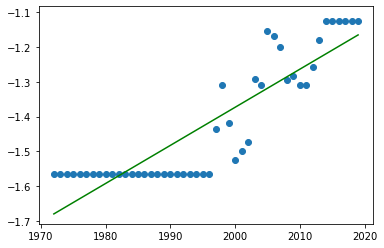

In [0]:
Y = np.array(scatterable2['Rwanda'])
denom = X.dot(X) - X.mean()*X.sum()
m = (X.dot(Y) - Y.mean()*X.sum()) / denom
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y)) / denom
y_pred = m*X + b
plt.scatter(X,Y)
if m >= 0:
  plt.plot(X,y_pred, 'g');
else:
  plt.plot(X,y_pred, 'r');
print("m=",m," mean=",Y.mean()," median=",np.median(Y))

In [0]:
HPI_coeffs = []
HPI_means = []

In [0]:
df_tv.iloc[0]

0                Afghanistan
1                    Albania
2                    Algeria
3             American Samoa
4                    Andorra
               ...          
210    Virgin Islands (U.S.)
211       West Bank and Gaza
212              Yemen, Rep.
213                   Zambia
214                 Zimbabwe
Name: Country Name, Length: 215, dtype: object

In [0]:
for state in df_tv.iloc[0]:
  Y = np.array(scatterable2[state])
  denom = X.dot(X) - X.mean()*X.sum()
  m = (X.dot(Y) - Y.mean()*X.sum()) / denom
  HPI_coeffs.append(m)
  HPI_means.append(Y.mean())

In [0]:
print(len(HPI_coeffs))
print(len(HPI_means))

215
215


In [0]:
precodex = pd.DataFrame({'Nation_State':df_tv.iloc[0],
                             'PWGI_Voice_Acct_coeff':HPI_coeffs,
                             'PWGI_Voice_Acct_mean':HPI_means})
precodex

,Nation_State,PWGI_Voice_Acct_coeff,PWGI_Voice_Acct_mean
0,Afghanistan,0.019028,-1.665424
1,Albania,0.026197,-0.399324
2,Algeria,0.009438,-1.150740
3,American Samoa,0.014225,0.630911
4,Andorra,-0.007527,1.450212
...,...,...,...
210,Virgin Islands (U.S.),0.002898,0.757710
211,West Bank and Gaza,0.006951,-1.013978
212,"Yemen, Rep.",-0.018052,-0.906162
213,Zambia,0.005642,-0.344882


In [0]:
codex0 = pd.read_excel('EW Gini NANs.xlsx')
codex = codex0.iloc[:,0:2]
codex.rename(columns={'Country Name':'Nation_State',
                      'Country Code':'NS_code'},inplace=True)
codex.head()

,Nation_State,NS_code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND


In [0]:
merge0 = pd.merge(precodex,codex,how='left',on='Nation_State')
merge0.drop(columns='Nation_State',inplace=True)
merge0.head()

,PWGI_Voice_Acct_coeff,PWGI_Voice_Acct_mean,NS_code
0,0.019028,-1.665424,AFG
1,0.026197,-0.399324,ALB
2,0.009438,-1.150740,DZA
3,0.014225,0.630911,ASM
4,-0.007527,1.450212,AND


In [0]:
master_prev = pd.read_excel('Master12.xlsx')
master_prev.shape

(158, 26)

In [0]:
downloadable = pd.merge(master_prev,merge0,how='left',on='NS_code')
downloadable

,NS_code,Nation_State,TARG_HPI_trend_coeff,TARG_HPI_mean,CWGI_Gov_Effect_trend_coeff,CWGI_Gov_Effect_mean,CWGI_Poli_Stable_trend_coeff,CWGI_Poli_Stabl_mean,CWGI_Reg_Quality_trend_coeff,CWGI_Reg_Quality_mean,CWGI_Rule_of_Law_trend_coeff,CWGI_Rule_of_Law_mean,EW_Banks_per_cap_trend_coeff,EW_Banks_per_cap_mean,EW_Firms_Fem_trend_coeff,EW_Firms_Fem_mean,EW_GINI_trend_coeff,EW_GINI_mean,EW_Startup_Time_trend_coeff,EW_Startup_Time_mean,PTI_CPI_trend_coeff,PTI_CPI_mean,PW_Women_Legis_coeff,PW_Women_Legis_mean,PWGI_Corruption_Ctrl_coeff,PWGI_Corruption_Ctrl_mean,PWGI_Voice_Acct_coeff,PWGI_Voice_Acct_mean
0,ALB,Albania,0.152621,0.772789,0.016971,-0.602911,0.015449,-0.291350,0.016616,-0.215884,0.011982,-0.820834,0.307187,13.151660,0.000000e+00,11.700000,7.796063e-02,28.280253,-0.843302,32.000000,0.022811,0.671106,-0.349758,20.343958,0.014448,-0.903248,0.026197,-0.399324
1,DZA,Algeria,0.065685,0.751174,0.012334,-0.787417,0.019112,-1.618480,-0.008023,-0.834295,0.014256,-0.998866,0.011779,4.853498,NaN,NaN,-3.562126e-01,34.694657,-0.132219,23.583333,-0.006889,1.105199,0.522868,7.999154,-0.003515,-0.560838,0.009438,-1.150740
2,AGO,Angola,0.030949,-1.138538,-0.010314,-1.010309,0.049289,-1.518250,0.011755,-1.341363,0.011910,-1.502659,0.174227,3.640017,0.000000e+00,13.500000,-2.516395e-01,48.996676,-0.743053,75.708333,0.016065,-0.813398,0.498469,19.583415,-0.006808,-1.251399,0.014813,-1.442009
3,ARG,Argentina,0.029558,1.154674,-0.013240,0.098574,-0.001396,-0.030462,-0.046138,0.029029,-0.024712,-0.285626,-0.002406,13.318683,-1.615096e-02,9.050020,6.693095e-02,44.604196,-1.175613,51.822917,0.037286,1.020862,0.938851,21.232201,-0.008956,-0.326385,-0.000105,0.288310
4,ARM,Armenia,0.031056,0.049490,0.007576,-0.321756,0.012170,-0.374476,0.017373,-0.112343,0.003890,-0.439674,0.265397,13.644794,1.016619e-01,14.491547,-1.268669e-01,34.604178,-0.258142,15.416667,0.012542,-1.107243,-0.749603,20.957561,-0.001708,-0.519385,0.003777,-0.666093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,ZWE,Zimbabwe,0.186163,-1.428003,-0.030171,-0.636296,-0.010927,-0.751132,-0.029048,-1.371342,-0.023115,-1.143652,0.107179,4.072049,-1.492739e-02,17.262487,5.054942e-14,43.200000,-1.515469,115.270833,NaN,NaN,0.369917,15.096815,-0.033391,-0.711929,-0.023549,-0.958650
154,IRQ,Iraq,0.026394,0.162841,0.020479,-1.709068,-0.015329,-2.041742,0.021950,-1.767216,-0.000190,-1.528319,0.031804,3.741055,-3.159339e-15,2.300000,1.909231e-02,28.796879,-0.030178,30.208333,-0.005915,-0.383333,0.389728,14.699527,0.005518,-1.456260,0.021144,-1.706947
155,SRB,Serbia,-0.008605,0.234387,0.025597,-0.609358,0.028255,-0.875805,0.019883,-0.530049,0.027269,-0.970418,0.309634,26.256284,-2.904624e-02,15.616701,-3.538862e-03,39.766667,-1.182995,42.718750,NaN,NaN,0.459897,16.709375,0.022016,-0.767842,0.045606,-0.714953
156,AFG,Afghanistan,-0.023271,-0.664633,0.025988,-1.917496,0.002966,-2.496141,0.023173,-1.858583,0.001924,-1.744073,0.043773,0.841285,7.226363e-02,1.408371,NaN,NaN,-0.016772,9.354167,0.005244,-1.233043,0.718506,14.619849,0.012418,-1.694946,0.019028,-1.665424


In [0]:
downloadable.to_excel("Master13.xlsx", index=False)